<a href="https://colab.research.google.com/github/TGJAISAI/EDA/blob/main/real%20estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as px 

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/TGJAISAI/training-dataset-/main/move.csv')
df.head()

,Unnamed: 0,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [5]:
df.tail()

,Unnamed: 0,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


In [6]:
df.dtypes

Unnamed: 0       int64
metro           object
price            int64
way             object
views            int64
provider        object
fee_percent      int64
storey           int64
minutes          int64
storeys          int64
living_area      int64
kitchen_area     int64
total_area       int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Unnamed: 0,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,722.500000,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,417.568557,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,0.000000,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,361.250000,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,722.500000,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,1083.750000,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,1445.000000,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


In [9]:
df.provider.value_counts()

realtor                          615
realtor                          415
owner                            238
agency                            92
Застройщик                        68
agency                            10
agency                             8
Name: provider, dtype: int64

there are wrong format data in provider lets replace it 

In [68]:
df.rename(columns = {'metro':'area'}, inplace = True)
df.replace(to_replace='Застройщик',value='builder',inplace=True)
df.head()

,area,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [11]:
df.drop(["Unnamed: 0"],axis =1,inplace=True)

**lets have look at who owns the housing mark ? ✌🏻**

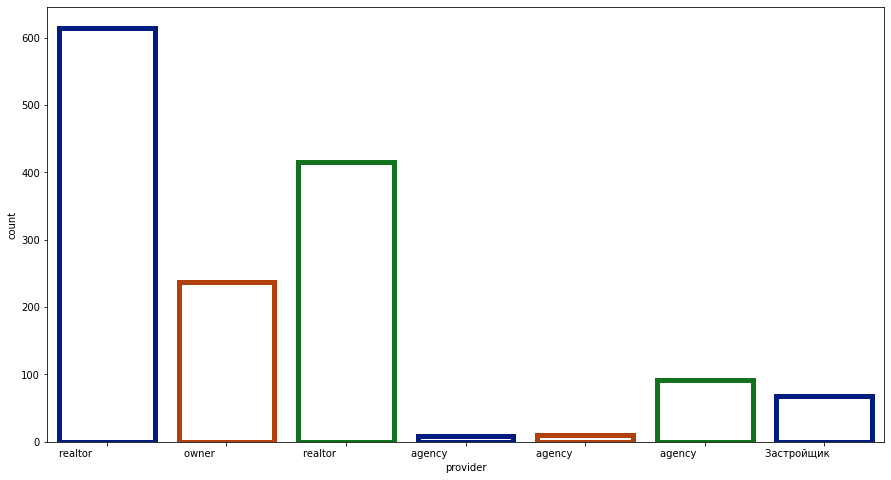

In [14]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="provider", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

**lets see what the count of the way ?🙄**

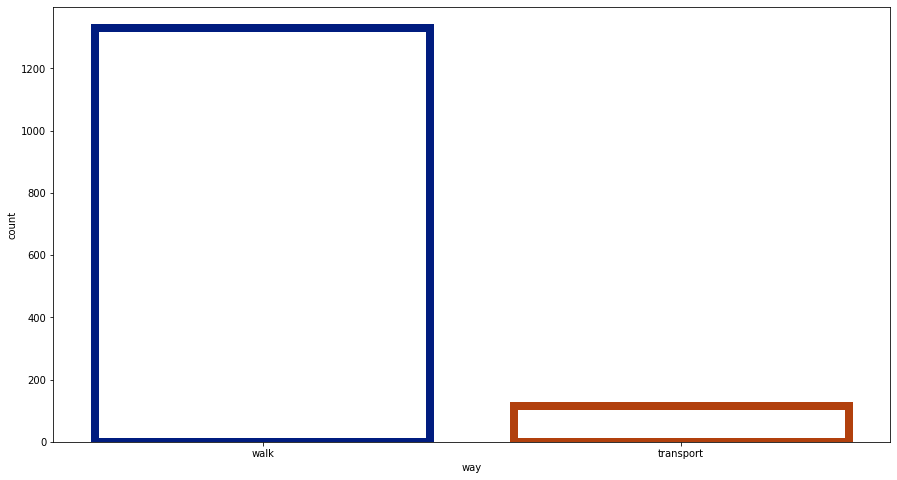

In [15]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="way",data =df,
                   facecolor=(0,0,0,0),
                   linewidth=8,
                    edgecolor=sns.color_palette("dark", 3))

In [ ]:
df.storey.value_counts()

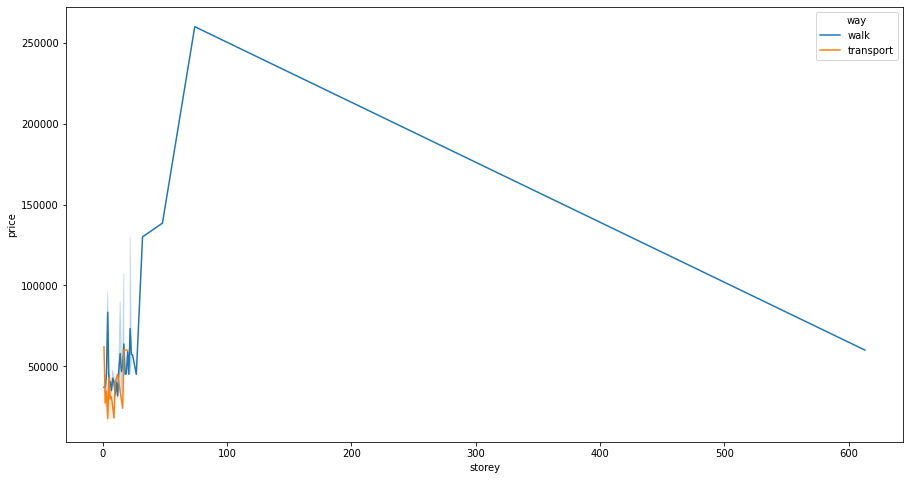

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x="storey", y="price", hue= "way")

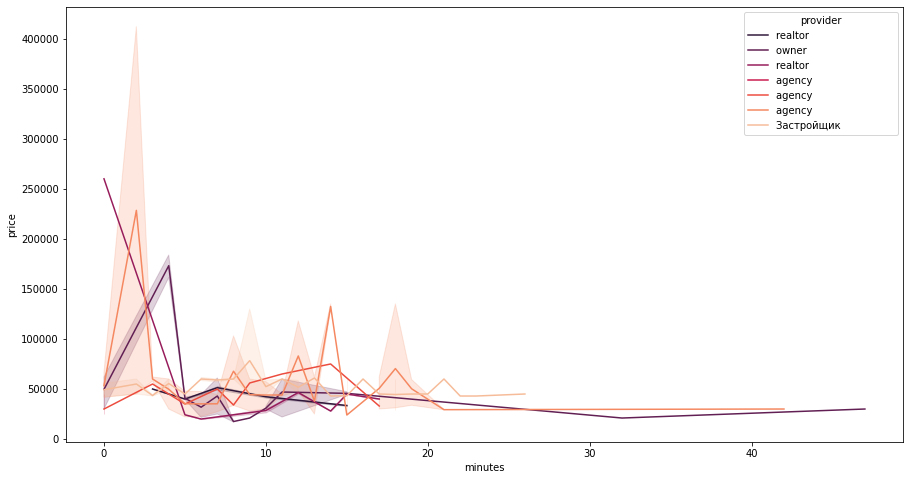

In [18]:
palette = sns.color_palette("mako_r", 6)
plt.figure(figsize=(15,8))
sns.lineplot(
    data=df, x="minutes", y="price",
    hue="provider",
    palette=("rocket")
)

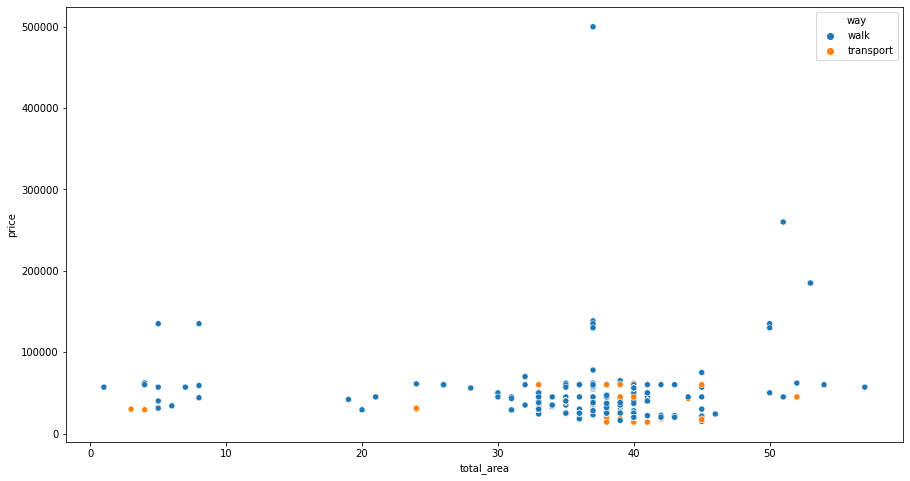

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="total_area", y="price",hue="way")

<Figure size 1080x576 with 0 Axes>

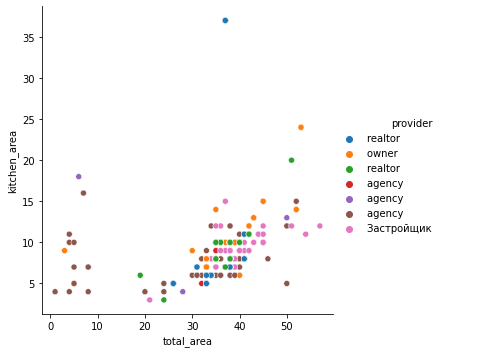

In [20]:
plt.figure(figsize=(15,8))
sns.relplot(data=df, x="total_area", y="kitchen_area", hue='provider')

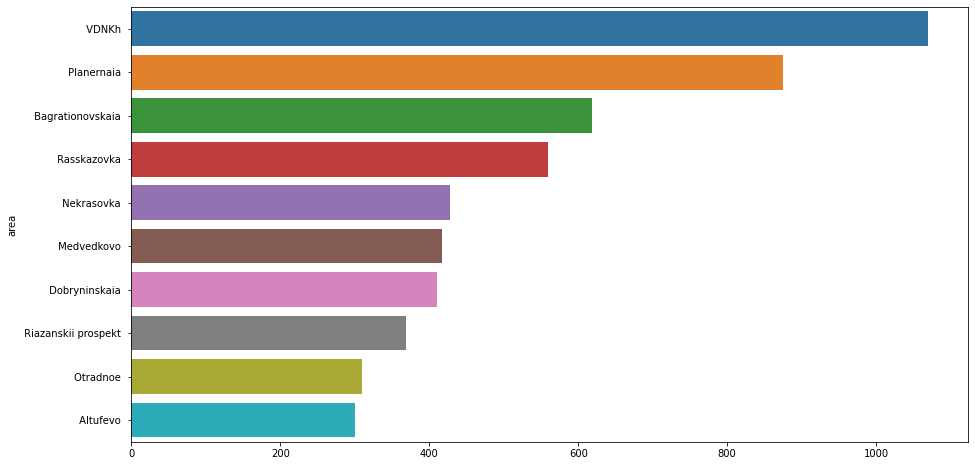

In [51]:
b=df.groupby('area')['storey'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
fig= sns.barplot(x= b.values, y = b.index)

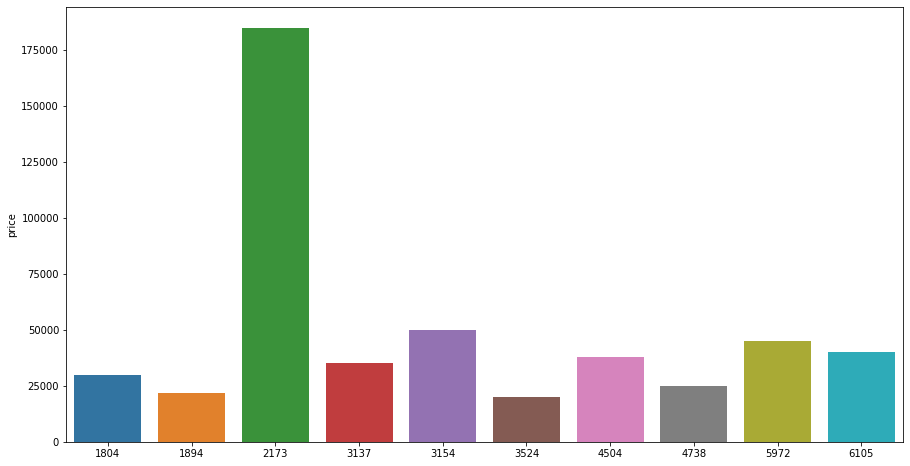

In [54]:

b=df.groupby("price")['total_area'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,8))
fig= sns.barplot(x= b.values, y = b.index)

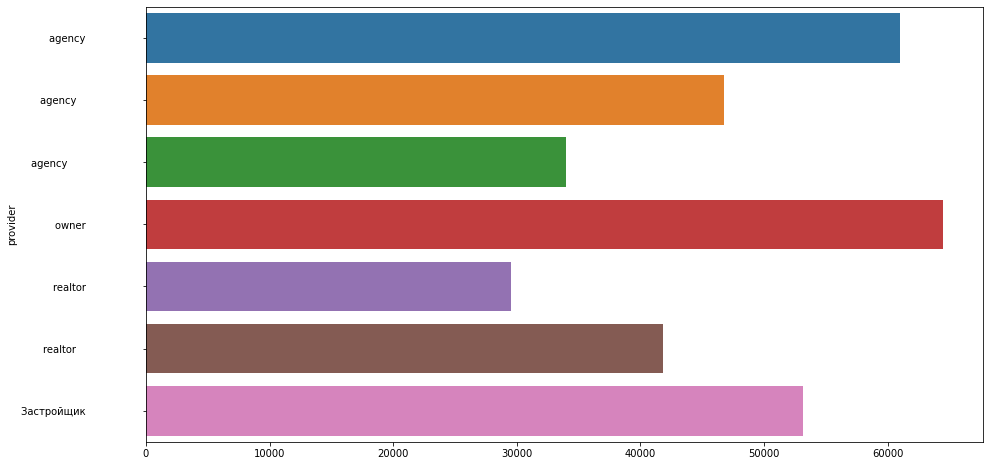

In [67]:
b=df.groupby('provider')['price'].mean()
plt.figure(figsize=(15,8))
fig= sns.barplot(x= b.values, y = b.index)


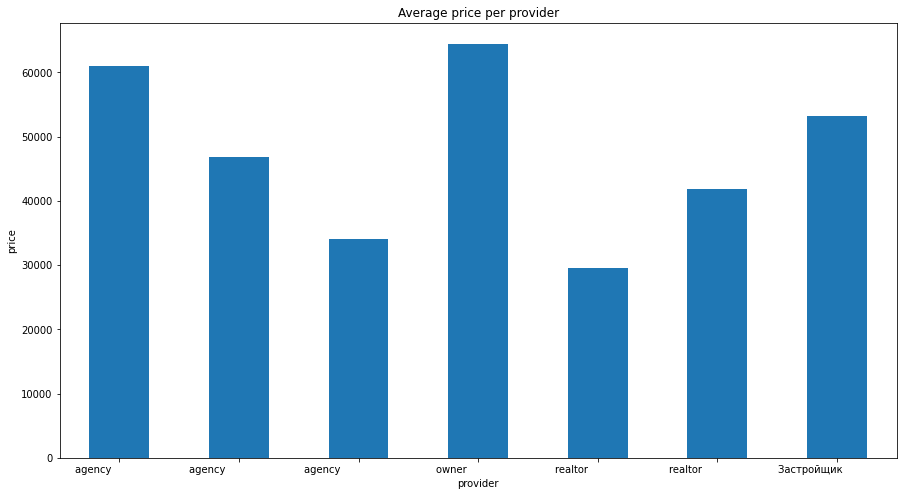

In [61]:
df[['price','provider']].groupby(by = 'provider').mean().round(decimals=1).plot(
    kind = 'bar', figsize = (15,8),  rot = 0, legend = None,
    xlabel = 'provider', ylabel = 'price', title = 'Average price per provider'
    )
plt.show()

**Feature selection**✌🏻

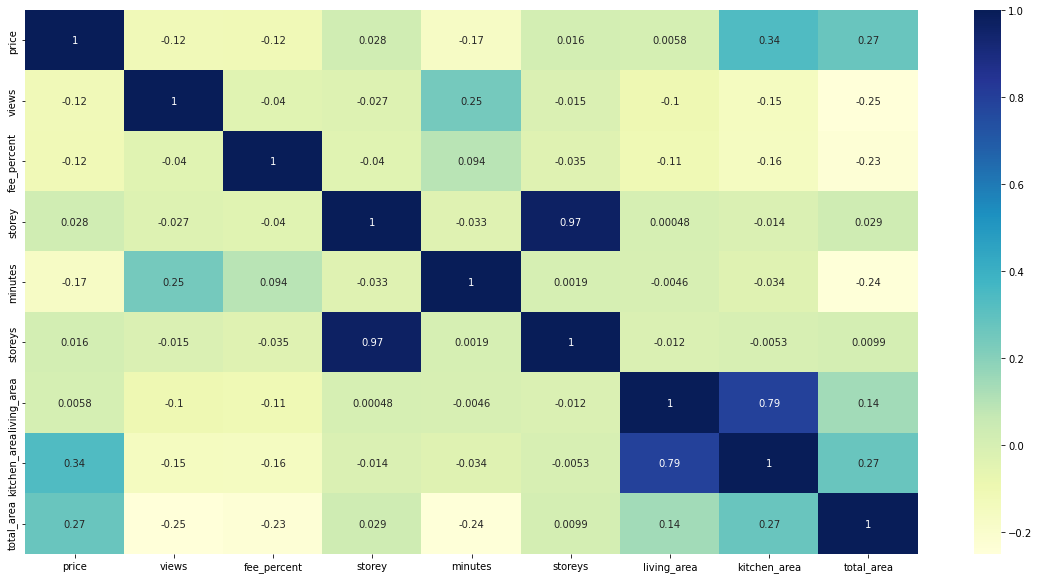

In [72]:
plt.figure(figsize=(20,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()